<a href="https://colab.research.google.com/github/StevenVuong/MSc_Project/blob/master/misc5(gaussian_mask).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# standard imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

%matplotlib inline

# to mount our drive
from google.colab import drive

# import keras stuff
from keras.models import Sequential, load_model
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution3D, MaxPooling3D, Convolution1D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD, RMSprop, Adam
from keras.utils import np_utils, generic_utils, to_categorical
from keras.layers import LeakyReLU
from keras import regularizers

# to test our dataset
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# for gaussian mask
from scipy.ndimage import gaussian_filter

Using TensorFlow backend.


In [2]:
# mount google drive
drive.mount('/content/gdrive')

os.chdir('/content')

# go to where the data is
print (os.listdir())
os.chdir('gdrive/My Drive/msc_project/all_mprage_grappa')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
['.config', 'gdrive', 'sample_data']


In [0]:
# gets our y-values and converts to keras, one hot encoded outputs
def get_y_values(total_slices_info):
  
  y_values = [s[2] for s in total_slices_info]

  y_values = np.array(to_categorical(y_values, 2))
  
  return y_values

In [0]:
def to_binary(cat_array):
  '''Function to convert categorical back to binary values'''
  binary_output_array = []
  for i in range(len(cat_array)):
    binary_output_array.append(np.argmax(cat_array[i]))
    
  binary_output_array = np.array(binary_output_array)
  return binary_output_array

**In this notebook we will experiment with a Gaussian mask and/or very few number of 2D slices to make up our 3D imae to see if it works in our classifier**

In [0]:
# Load a batch
# Apply gaussian filter
# try run through model
# test

**Combine all into a super array**

In [0]:
# write something to get all the slices, process and add to a super array

In [0]:
# build the first one
total_slices_all = []
total_info_all = []

total_slices_all.append(total_slices)
total_info_all.append(y_values)

total_slices_all = np.array(total_slices_all)[0]
total_info_all = np.array(total_info_all)[0]

print ("Shape of total slices all: %s" %(np.shape(total_slices_all),))
print ("Shape of total y values all: %s" %(np.shape(total_info_all),))

Shape of total slices all: (100, 70, 160, 160, 1)
Shape of total y values all: (100, 2)


In [0]:
# add on other slices
total_slices_all = np.concatenate((total_slices_all, total_slices))
total_info_all = np.concatenate((total_info_all, y_values))

print ("Shape of total slices all: %s" %(np.shape(total_slices_all),))
print ("Shape of total slices all: %s" %(np.shape(total_info_all),))

Shape of total slices all: (200, 70, 160, 160, 1)
Shape of total slices all: (200, 2)


**Below is one stop integrated cell (super messy) to build our super arrays of sigmified brainslices**

In [8]:
# just set the sigma value and run
sigma_value = 3.0

total_slices_all = []
total_info_all = []

for iii in range(5):
  with open('processed_brains/processed_brains_aug/dbatch'+str(iii)+'.pkl', 'rb') as f:
    total_slices, total_slices_info = pickle.load(f) 
    
  # apply gaussian mask to our images
  for i in range(len(total_slices[:,:,:,:,0])):
    ts = total_slices[i, :, :, :, 0]
    for j in range(len(ts)):
      s = ts[j, :, :]
      ## apply gaussian mask
      tg = gaussian_filter(s, sigma = sigma_value) # will have to play around with this to get optimal value
      ts[j, :, :] = tg
    total_slices[i, :, :, :, 0] = ts
    
  # get the region of slices we want    
  total_slices = total_slices[:, 45:115, :, :, :]
  
  # get y values
  y_values = get_y_values(total_slices_info)

  # for first run, make that the array and go from there
  if (iii == 0):# i has been hijacked
    # append to super array
    total_slices_all = total_slices
    total_info_all = y_values
    total_slices_all = np.array(total_slices_all)
    total_info_all = np.array(total_info_all)
    
    # add on the other for non-zero values
  if (iii != 0):
    total_slices_all = np.concatenate((total_slices_all, total_slices))
    total_info_all = np.concatenate((total_info_all, y_values))
  
print ("Shape of total slices all: %s" %(np.shape(total_slices_all),))
print ("Shape of total y values all: %s" %(np.shape(total_info_all),))

Shape of total slices all: (440, 70, 160, 160, 1)
Shape of total y values all: (440, 2)


**Can skip straight to below if want to just use 3sig slices**

In [0]:
# save as pickle files
# pickle.dump( total_slices_all, open( "gaussian_mask/3sig_slice.p", "wb" ) )
# pickle.dump( total_info_all, open( "gaussian_mask/3sig_info.p", "wb" ) )

# load our pickle files now
total_slices_all = pickle.load( open( "gaussian_mask/3sigma/run2/3sig_slice.p", "rb" ) )
total_info_all = pickle.load( open( "gaussian_mask/3sigma/run2/3sig_info.p", "rb" ) )

In [0]:
# below are for plotting graph purposes more than anything else
tststs = []
for iii in range(5):
  with open('processed_brains/processed_brains_aug/dbatch'+str(iii)+'.pkl', 'rb') as f:
    total_slices, total_slices_info = pickle.load(f) 
    for jjj in total_slices_info:
      tststs.append(jjj)

In [13]:
ages = [az[3] for az in tststs]
diagnosis = [az[2] for az in tststs]

# make df
data = {'Group':diagnosis, 'Age':ages} 
big_boi_df = pd.DataFrame(data) 
big_boi_df["Age"] = pd.to_numeric(big_boi_df["Age"])
big_boi_df.head()

,Group,Age
0,1,56
1,1,56
2,0,73
3,0,73
4,0,68


In [0]:
# split to training and test set
xtrain, xtest = train_test_split(tststs, test_size=0.13)

In [17]:
os.getcwd()
os.chdir('..')
print(os.getcwd())

/content/gdrive/My Drive/msc_project


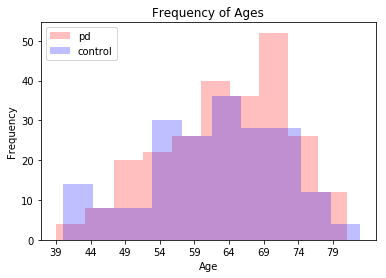

In [19]:
# plot for the ages
pd_df = big_boi_df[big_boi_df['Group'] == '1']
control_df =  big_boi_df[big_boi_df['Group'] == '0']

plt.hist(pd_df.Age, align='mid', alpha=0.25, color='r', label='pd', bins=10)
plt.hist(control_df.Age, align='mid', alpha=0.25, color='b', label='control', bins=10)
plt.legend(loc='upper left')

# set labels
plt.ylabel('Frequency')
plt.xlabel('Age')
plt.title('Frequency of Ages')

# set ticks
plt.xticks(np.arange(min(big_boi_df.Age), max(big_boi_df.Age)+1, 5.0))
# plt.savefig('figures/3d_ageFreq.png')
plt.show()

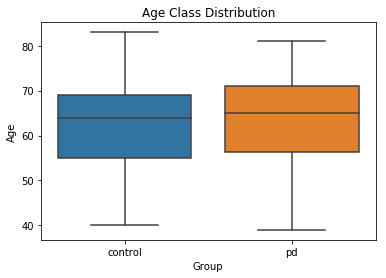

In [20]:
# some boxplots
ax = sns.boxplot(x="Group", y="Age", data=big_boi_df)
ax.set_xticklabels(['control', 'pd'])
plt.title("Age Class Distribution")
# plt.savefig('figures/3d_boxplot.png')
plt.show()

In [12]:
np.shape(tststs)

(440, 4)

**Run our model now**

In [0]:
# split to training and test set
X_train, X_test, y_train, y_test = train_test_split(total_slices_all, total_info_all, test_size=0.15)

In [0]:
def initialise_model():

  # compile our model
  model = Sequential()
  
  model.add(Convolution3D(filters=32, kernel_size=3, padding='same', strides=2, input_shape=(70,160,160,1),
                          kernel_regularizer=regularizers.l2(0.007), bias_regularizer=regularizers.l2(0.007))) # padding on first one only?
  model.add(LeakyReLU(alpha=0.15)) # set to 0.01
  model.add(BatchNormalization(momentum=0.2))
  model.add(MaxPooling3D(pool_size=2, strides=1, padding='same')) # pool_size=2
  # could user he_norm kernel initializer?
  
  model.add(Convolution3D(filters=64, kernel_size=3, padding='same', strides=2,
                          kernel_regularizer=regularizers.l2(0.007), bias_regularizer=regularizers.l2(0.007))) # padding on first one only?
  model.add(LeakyReLU(alpha=0.15)) # set to 0.01
  model.add(BatchNormalization(momentum=0.2))
  model.add(MaxPooling3D(pool_size=2, strides=1, padding='same')) # pool_size=2
  
  model.add(Convolution3D(filters=128, kernel_size=3, padding='same', strides=2,
                          kernel_regularizer=regularizers.l2(0.007), bias_regularizer=regularizers.l2(0.007))) # padding on first one only?
  model.add(LeakyReLU(alpha=0.15)) # set to 0.01
  model.add(BatchNormalization(momentum=0.2))
  model.add(MaxPooling3D(pool_size=2, strides=1, padding='same')) # pool_size=2

  model.add(Convolution3D(filters=256, kernel_size=3, padding='same', strides=2,
                          kernel_regularizer=regularizers.l2(0.007), bias_regularizer=regularizers.l2(0.007))) # padding on first one only?
  model.add(LeakyReLU(alpha=0.15)) # set to 0.01
  model.add(BatchNormalization(momentum=0.2))
  model.add(MaxPooling3D(pool_size=2, strides=1, padding='same')) # pool_size=2
  
  model.add(Convolution3D(filters=512, kernel_size=2, padding='same', strides=2,
                          kernel_regularizer=regularizers.l2(0.007), bias_regularizer=regularizers.l2(0.007))) # padding on first one only?
  model.add(LeakyReLU(alpha=0.15)) # set to 0.01
  model.add(BatchNormalization(momentum=0.2))
  model.add(MaxPooling3D(pool_size=2, strides=2, padding='same')) # pool_size=2
  
  model.add(Flatten())
   
  model.add(Dense(512, kernel_regularizer=regularizers.l2(0.007)))
  model.add(LeakyReLU(alpha=0.15)) # set to 0.01
  
  model.add(Dropout(0.20)) # add dropout to prevent overfitting
  
  model.add(Dense(64, kernel_regularizer=regularizers.l2(0.007)))
  model.add(LeakyReLU(alpha=0.15)) # set to 0.01
  
  model.add(Dropout(0.35)) # add dropout to prevent overfitting

  model.add(Dense(2, activation='softmax'))

  model.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy',metrics = ['categorical_accuracy'])

  return model

In [21]:
model = initialise_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_6 (Conv3D)            (None, 35, 80, 80, 32)    896       
_________________________________________________________________
leaky_re_lu_8 (LeakyReLU)    (None, 35, 80, 80, 32)    0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 35, 80, 80, 32)    128       
_________________________________________________________________
max_pooling3d_6 (MaxPooling3 (None, 35, 80, 80, 32)    0         
_________________________________________________________________
conv3d_7 (Conv3D)            (None, 18, 40, 40, 64)    55360     
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 18, 40, 40, 64)    0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 18, 40, 40, 64)    256       
__________

In [0]:
hist = model.fit(x=X_train, y=y_train, batch_size = 15, epochs=300, verbose=1, shuffle=True,validation_split=0.05)

Train on 355 samples, validate on 19 samples
Epoch 1/300
285/355 [=======================>......] - ETA: 5s - loss: 13.7844 - categorical_accuracy: 0.4982

**Diagnostics**

In [49]:
###############################################################################################
## LOAD DIAGNOSTICS ##
###############################################################################################
X_train, X_test, y_train, y_test, model, hist, score, acc =  pickle.load( open( "all_mprage_grappa/gaussian_mask/3sigma/run2/3sig_diagnostics.p", "rb" ) )

W0731 06:06:52.149437 139888005027712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0731 06:06:52.223930 139888005027712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0731 06:06:52.373357 139888005027712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:131: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0731 06:06:52.374337 139888005027712 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0731 06:06:52.993619

In [50]:
score, acc = model.evaluate(X_test, y_test)
print ("The score of the model: %f, The mean accuracy of the model: %f" % (score, acc))

66/66 [==============================] - 5s 78ms/step
The score of the model: 0.477983, The mean accuracy of the model: 0.939394


In [30]:
# confusion matrix for training data
y_pred_train = model.predict(X_train)
y_pred_train = to_binary(y_pred_train)
y_actual_train = to_binary(y_train)

confusion_matrix(y_actual_train, y_pred_train)

array([[173,   1],
       [  0, 200]])

In [29]:
# Generate confusion matrix for test data
# get predictions
y_pred = model.predict(X_test)
y_pred = to_binary(y_pred)
y_test = to_binary(y_test)

confusion_matrix(y_test, y_pred)

array([[19,  1],
       [ 3, 43]])

dict_keys(['val_loss', 'val_categorical_accuracy', 'loss', 'categorical_accuracy'])


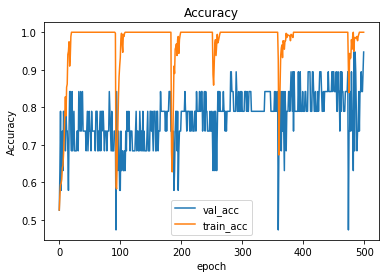

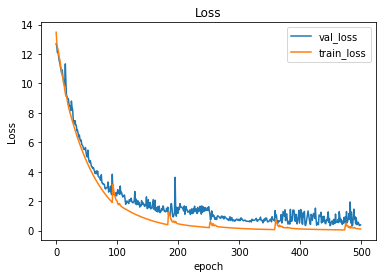

In [54]:
# https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# list all data in history
print(hist.history.keys())
# summarize history for accuracy
plt.plot(hist.history['val_categorical_accuracy'])
plt.plot(hist.history['categorical_accuracy'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['val_acc', 'train_acc'], loc='best')
# plt.savefig('figures/gausmask_3d_acc.png')
plt.show()
# summarize history for loss
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['val_loss', 'train_loss'], loc='best')
# plt.savefig('figures/gausmask_3d_loss.png')
plt.show()

**Save train set, test set, score, accuracy and history**

In [0]:
###############################################################################################
# SAVE DIAGNOSTICS #
###############################################################################################
all_diagnostics = [X_train, X_test, y_train, y_test, model, hist, score, acc]
# pickle.dump( all_diagnostics, open( "gaussian_mask/3sig_diagnostics.p", "wb" ) )

**Visualise brains**

In [0]:
# Load a batch for visuals
with open('processed_brains/processed_brains_aug/dbatch0.pkl', 'rb') as f:
  total_slices, total_slices_info = pickle.load(f) 

In [0]:
# apply gaussian mask to our images
for i in range(len(total_slices[:,:,:,:,0])):
  ts = total_slices[i, :, :, :, 0]
  for j in range(len(ts)):
    s = ts[j, :, :]
    ## apply gaussian mask
    tg = gaussian_filter(s, sigma=3.5) # Can play around with this to get the optimal value
    ts[j, :, :] = tg
  total_slices[i, :, :, :, 0] = ts

In [48]:
total_slices = total_slices[:, 45:115, :, :, :]
np.shape(total_slices)

(100, 70, 160, 160, 1)

In [0]:
# get y values
y_values = get_y_values(total_slices_info)

In [50]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets # interactive plots
import matplotlib.pyplot as plt
%matplotlib inline

# view a gaussian smoothed brain
slice_ex = total_slices[50, :, :, :, 0]
def g(i): # basic slideshow plot to get an idea of the effectiveness of the mask itself
    plt.figure(figsize=(15,8)) # make plot larger
    plt.imshow(slice_ex[i])
    plt.axis('off')
    plt.show()
    # plt.imsave('gaussian_mask/3dot5sig_example.png', slice_ex[i])
    return None

interact(g, i=widgets.IntSlider(min=0,max=(len(slice_ex)-1),step=1,value=34)); # 140 for axial view. 88 for sag

interactive(children=(IntSlider(value=34, description='i', max=69), Output()), _dom_classes=('widget-interact'…